In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import cv2
import numpy as np
from keras.models import load_model
import keras_ocr
import random
import string
from scipy import stats
from PIL import Image

In [ ]:
# Load the document or image using layoutparser
image = cv2.imread(r'D:\outfile.png')

# Global variables
drawing = False
ix, iy = -1, -1
roi_points = []
coordinate_point=[]

def draw_roi(event, x, y, flags, param):
    global ix, iy, drawing, roi_points

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y
      

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        roi_points.append((ix, iy))
        roi_points.append((x, y))
        cv2.rectangle(image , (ix, iy), (x, y), (0, 255, 0), 2)
        cv2.imshow('Image', image)
       



# Create a window and set the mouse callback function
cv2.namedWindow('Image')
cv2.setMouseCallback('Image', draw_roi)

# Show the image
cv2.imshow('Image', image)

# Wait for Enter key press
while True:
    key = cv2.waitKey(1) & 0xFF
    if key == 13:  # ASCII code for Enter key
        break

# Plot the ROI
if len(roi_points) == 2:
    coordinate_point.append(roi_points)
    flatten_list = sum(coordinate_point, [])
    roi = image[roi_points[0][1]:roi_points[1][1], roi_points[0][0]:roi_points[1][0]]
    plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
roi = image[roi_points[0][1]:roi_points[1][1], roi_points[0][0]:roi_points[1][0]]

cv2.destroyAllWindows()
print(roi)

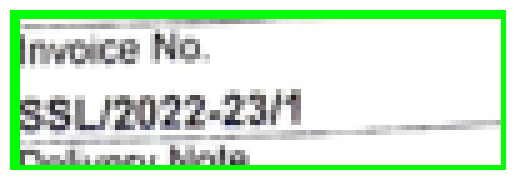

Image saved in C:\Users\USER\Desktop\paddel_ocr_1\training_image\saved_image.jpgsaved_image.jpg


In [2]:
# Load the document or image using layoutparser
image = cv2.imread(r'D:\outfile.png')

# Global variables
drawing = False
ix, iy = -1, -1
roi_points = []
coordinate_point=[]

def draw_roi(event, x, y, flags, param):
    global ix, iy, drawing, roi_points

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        roi_points.append((ix, iy))
        roi_points.append((x, y))
        cv2.rectangle(image , (ix, iy), (x, y), (0, 255, 0), 2)
        cv2.imshow('Image', image)



# Create a window and set the mouse callback function
cv2.namedWindow('Image')
cv2.setMouseCallback('Image', draw_roi)

# Show the image
cv2.imshow('Image', image)

# Wait for Enter key press
while True:
    key = cv2.waitKey(1) & 0xFF
    if key == 13:  # ASCII code for Enter key
        break

# Plot the ROI
if len(roi_points) == 2:
    coordinate_point.append(roi_points)
    flatten_list = sum(coordinate_point, [])
    roi = image[roi_points[0][1]:roi_points[1][1], roi_points[0][0]:roi_points[1][0]]
    plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
roi = image[roi_points[0][1]:roi_points[1][1], roi_points[0][0]:roi_points[1][0]]
# Specify the folder path to save the image
folder_path = r'C:\Users\USER\Desktop\paddel_ocr_1\training_image\saved_image.jpg'

# Save the image with a desired filename
filename = 'saved_image.jpg'
cv2.imwrite(folder_path, roi)

print(f"Image saved in {folder_path + filename}")
# Clean up
cv2.destroyAllWindows()

split the original image_sample into its color channels 

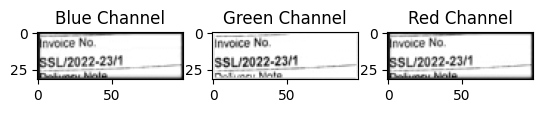

In [3]:
image_sample = cv2.imread(r'C:\Users\USER\Desktop\paddel_ocr_1\training_image\saved_image.jpg')
# Split the cropped image into color channels
blue_channel, green_channel, red_channel = cv2.split(image_sample)

# Display the individual color channels
plt.subplot(131)
plt.imshow(blue_channel, cmap='gray')
plt.title('Blue Channel')

plt.subplot(132)
plt.imshow(green_channel, cmap='gray')
plt.title('Green Channel')

plt.subplot(133)
plt.imshow(red_channel, cmap='gray')
plt.title('Red Channel')

plt.show()

In [6]:
folder_path = r'C:\Users\USER\Desktop\paddel_ocr_1\training_image\analysis_image.jpg'
cv2.imwrite(folder_path, green_channel)

True

In [7]:
# Open the image
image_properties = Image.open( r'C:\Users\USER\Desktop\paddel_ocr_1\training_image\analysis_image.jpg')
# Access image properties
width = image_properties .width
height = image_properties.height
dimensions = image_properties .size
image_format = image_properties .format
mode = image_properties .mode
num_channels = len(image_properties .split())

# Print the image properties
print("Image Size:")
print("Width:", width)
print("Height:", height)
print("Dimensions:", dimensions)

print("\nImage Format:")
print("Format:", image_format)

print("\nColor Channels:")
print("Mode:", mode)
print("Number of Channels:", num_channels)

Image Size:
Width: 95
Height: 15
Dimensions: (95, 15)

Image Format:
Format: JPEG

Color Channels:
Mode: L
Number of Channels: 1


In [8]:
image_sample = cv2.imread(r'C:\Users\USER\Desktop\paddel_ocr_1\training_image\analysis_image.jpg')

Image filtering

Image filtering in computer vision refers to the process of modifying the pixels of an image to achieve various effects or enhancements.

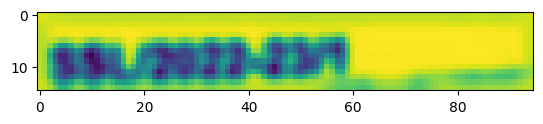

In [9]:
# Convert the image to grayscale
gray = cv2.cvtColor(image_sample, cv2.COLOR_BGR2GRAY)
# Apply Gaussian blur
blurred_image = cv2.GaussianBlur(gray, (5,5), sigmaX=0)
plt.imshow(blurred_image)
plt.show()

Gaussian smoothing is a common image blurring technique that reduces noise and removes high-frequency details while preserving the overall structure of the image. 

Unsharp masking

Unsharp masking is a popular image sharpening technique that involves subtracting a blurred version of an image from the original image and then adding it back with a weighted factor.

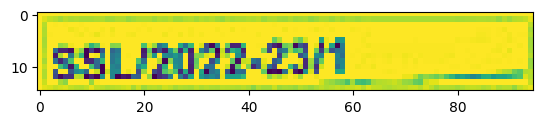

In [10]:
# Perform unsharp masking
unsharp_mask = cv2.addWeighted(gray, 1.5, blurred_image, -0.5, 0)

# Display the binary image
plt.imshow(unsharp_mask)
plt.show()

 crop

To crop an image using OpenCV in Python, you can define the region of interest (ROI) and extract the desired portion of the image.

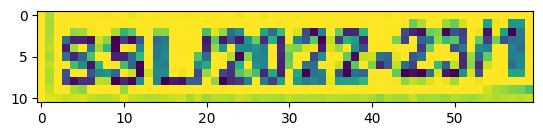

In [11]:
# Define the coordinates of the region of interest (ROI)
x = 0 # starting x-coordinate of the ROI
y = 4 # starting y-coordinate of the ROI
width = 60  # width of the ROI
height = 14  # height of the ROI

# Crop the image
cropped_image = unsharp_mask[y:y+height, x:x+width]
# Display the binary image
plt.imshow(cropped_image)
plt.show()

In [12]:
#minimum and maximum pixel value
# Find the minimum and maximum pixel values
min_value = np.min(cropped_image)
max_value = np.max(cropped_image)
# Calculate the mean
mean_value = np.mean(cropped_image)
# Calculate the median
median_value = np.median(cropped_image)
# Calculate the mode
mode_value = stats.mode(cropped_image.flatten(),keepdims=True)[0][0]

print("Minimum pixel value:", min_value)
print("Maximum pixel value:", max_value)
print("mean pixel value:", mean_value)
print("median pixel value:", median_value)
print("mode pixel value:", mode_value)

Minimum pixel value: 0
Maximum pixel value: 255
mean pixel value: 193.8212121212121
median pixel value: 236.0
mode pixel value: 255


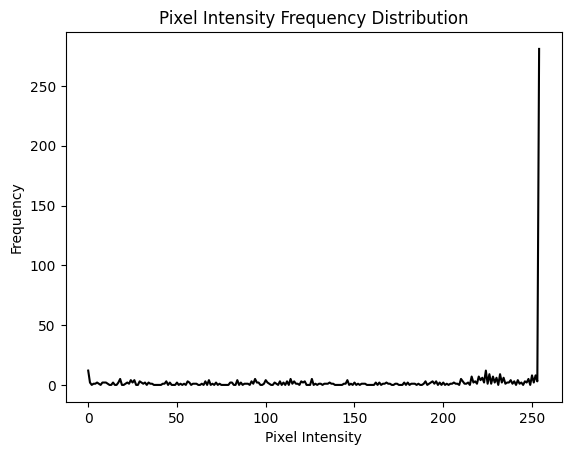

In [13]:
# Compute the histogram
hist, bins = np.histogram(cropped_image.flatten(), bins=255, range=[0, 255])

# Plot the histogram
plt.figure()
plt.plot(hist, color='black')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Pixel Intensity Frequency Distribution')
plt.show()

 Thresholding allows you to set a specific threshold value and then manipulate the pixel values based on that threshold.

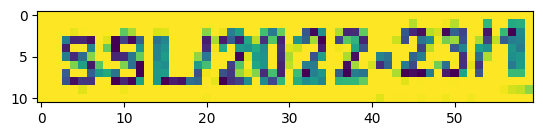

In [59]:

# Define the lower and upper intensity threshold values
lower_threshold = 221.0
upper_threshold = 255

# Trim the intensity range using thresholding
trimmed_image = cv2.threshold(cropped_image, lower_threshold, upper_threshold, cv2.THRESH_TRUNC)[1]

# Display the binary image
plt.imshow(trimmed_image)
plt.show()

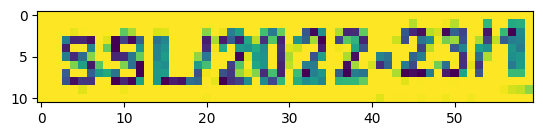

In [62]:

# Assuming you have an image named 'image' with a plain background

# Create a background subtractor object
background_subtractor = cv2.createBackgroundSubtractorMOG2()

# Apply background subtraction
foreground_mask = background_subtractor.apply(trimmed_image)

# Apply a threshold to create a binary mask
_, binary_mask = cv2.threshold(foreground_mask, 1, 255, cv2.THRESH_BINARY)

# Apply the binary mask to extract the foreground
foreground = cv2.bitwise_and(trimmed_image, trimmed_image, mask=binary_mask)

# Display the binary image
plt.imshow(foreground)
plt.show()

In [82]:
#sample picture
folder_path = r'C:\Users\USER\Desktop\paddel_ocr_1\training_image\sample_image.jpg'
cv2.imwrite(folder_path, foreground)

True

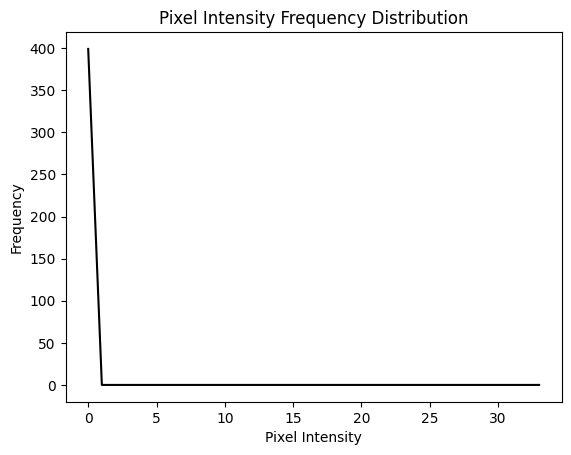

In [63]:
# Compute the histogram
hist, bins = np.histogram(foreground.flatten(), bins=34, range=[221, 255])

# Plot the histogram
plt.figure()
plt.plot(hist, color='black')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Pixel Intensity Frequency Distribution')
plt.show()

In [64]:
#minimum and maximum pixel value
# Find the minimum and maximum pixel values
min_value_t = np.min(foreground)
max_value = np.max(foreground)
# Calculate the mean
mean_value = np.mean(foreground)
# Calculate the median
median_value = np.median(foreground)
# Calculate the mode
mode_value = stats.mode(foreground.flatten(),keepdims=True)[0][0]

print("Minimum pixel value:", min_value_t)
print("Maximum pixel value:", max_value)
print("mean pixel value:", mean_value)
print("median pixel value:", median_value)
print("mode pixel value:", mode_value)

Minimum pixel value: 0
Maximum pixel value: 221
mean pixel value: 176.79848484848486
median pixel value: 221.0
mode pixel value: 221


Pixel value of each point 

In [85]:
all_p=[]
row_p=[]
col_p=[]
# Iterate over the image pixels
for row in range(foreground.shape[0]):
    for col in range(foreground.shape[1]):
        pixel = foreground[row, col]
        all_p.append(pixel)
        row_p.append(row)
        col_p.append(col)
        print("Pixel at (row={}, col={}): {}".format(row, col, pixel))
        

Pixel at (row=0, col=0): 221
Pixel at (row=0, col=1): 221
Pixel at (row=0, col=2): 221
Pixel at (row=0, col=3): 221
Pixel at (row=0, col=4): 221
Pixel at (row=0, col=5): 221
Pixel at (row=0, col=6): 221
Pixel at (row=0, col=7): 221
Pixel at (row=0, col=8): 221
Pixel at (row=0, col=9): 221
Pixel at (row=0, col=10): 221
Pixel at (row=0, col=11): 221
Pixel at (row=0, col=12): 221
Pixel at (row=0, col=13): 221
Pixel at (row=0, col=14): 221
Pixel at (row=0, col=15): 221
Pixel at (row=0, col=16): 221
Pixel at (row=0, col=17): 221
Pixel at (row=0, col=18): 221
Pixel at (row=0, col=19): 221
Pixel at (row=0, col=20): 221
Pixel at (row=0, col=21): 221
Pixel at (row=0, col=22): 221
Pixel at (row=0, col=23): 221
Pixel at (row=0, col=24): 221
Pixel at (row=0, col=25): 221
Pixel at (row=0, col=26): 221
Pixel at (row=0, col=27): 221
Pixel at (row=0, col=28): 221
Pixel at (row=0, col=29): 221
Pixel at (row=0, col=30): 221
Pixel at (row=0, col=31): 221
Pixel at (row=0, col=32): 221
Pixel at (row=0, col

In [86]:
df = pd.DataFrame(all_p, columns=[ "G"])
df.insert(0, 'Row_Coordinate', row_p)
df.insert(1, 'col_Coordinate', col_p)
top_5_rows = df.head(5)
print(top_5_rows)

   Row_Coordinate  col_Coordinate    G
0               0               0  221
1               0               1  221
2               0               2  221
3               0               3  221
4               0               4  221


Pixel at (row=0, col=0): [  1 255   0]
This means that at the top-left corner of the image, the Red channel has an intensity of 1, the Green channel has an intensity of 255 (maximum intensity), and the Blue channel has an intensity of 0 (minimum intensity).

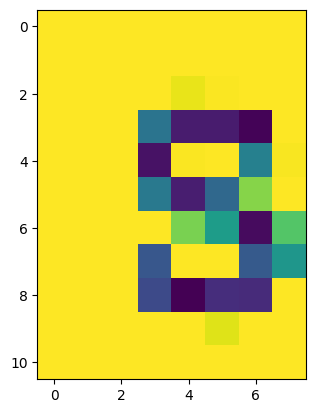

In [76]:
# Define the coordinates of the ROI
x1, y1 = 0,0 # Top-left corner
x2, y2 = 8,16  # Bottom-right corner

# Extract the ROI from the image
roi = foreground[y1:y2, x1:x2]

# Show the image with grid lines
plt.imshow(roi)
plt.show()

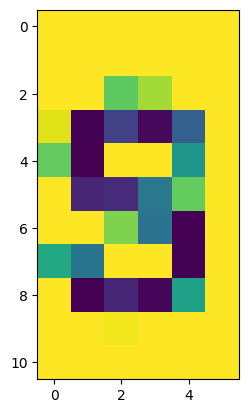

In [78]:
# Define the coordinates of the ROI
x1, y1 = 8,0 # Top-left corner
x2, y2 = 14,16  # Bottom-right corner

# Extract the ROI from the image
roi = foreground[y1:y2, x1:x2]

# Show the image with grid lines
plt.imshow(roi)
plt.show()

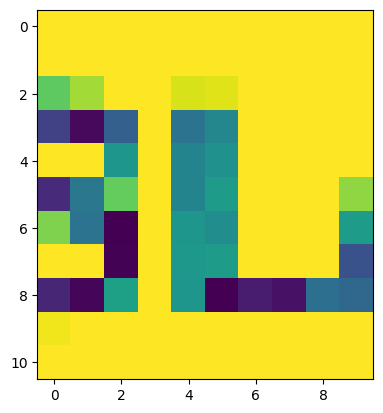

In [81]:
# Define the coordinates of the ROI
x1, y1 = 10,0 # Top-left corner
x2, y2 = 20,16  # Bottom-right corner

# Extract the ROI from the image
roi = foreground[y1:y2, x1:x2]

# Show the image with grid lines
plt.imshow(roi)
plt.show()